In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,...,False,False,False,False,False,False,False,False,False,2
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,night,5,19,13,True,New_York,America,Clear,26.1,...,False,False,False,False,False,False,False,False,False,5
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,evening,19,46,0,True,New_York,America,Clear,24.7,...,False,False,False,False,False,False,False,False,False,3
3,MTU2OTA5MTcyMDMzOTc0NzczODk=,morning,11,10,0,True,Hobart,Australia,Clear,12.7,...,False,False,False,False,False,False,False,False,False,4
4,NTE2OTkxNjE3OTUzODY0MTE4MQ==,evening,18,32,13,True,Los_Angeles,America,PartlyCloudy,19.1,...,False,False,False,False,False,False,False,False,False,3


In [4]:
len(df_train.columns)

184

In [5]:
df_train.columns[:20]

Index(['ID', 'appearedTimeOfDay', 'appearedHour', 'appearedMinute',
       'terrainType', 'closeToWater', 'city', 'continent', 'weather',
       'temperature', 'windSpeed', 'pressure', 'weatherIcon',
       'population_density', 'urban', 'suburban', 'midurban', 'rural',
       'gymDistanceKm', 'gymIn100m'],
      dtype='object')

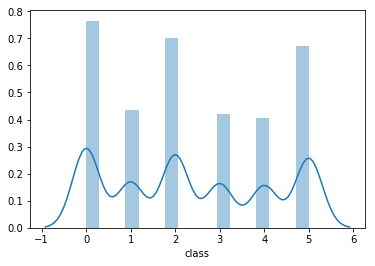

In [6]:
sns.distplot(df_train['class'])

### 看看 Heat Map

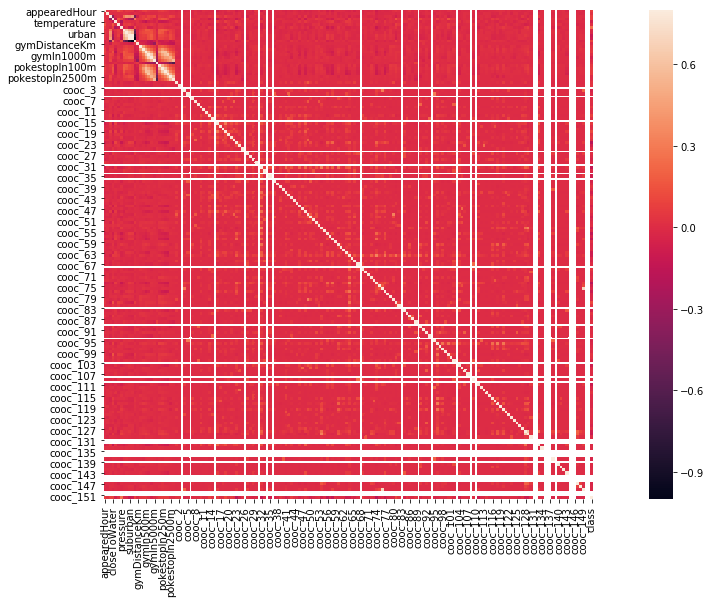

In [7]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### 看前 20 相關係數最高的兒

In [8]:
# class correlation matrix

k = 20 
cols = corrmat.nlargest(k, 'class')['class'].index
cols

Index(['class', 'pressure', 'cooc_81', 'cooc_19', 'rural', 'cooc_13',
       'closeToWater', 'terrainType', 'appearedHour', 'cooc_43',
       'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m',
       'cooc_21', 'cooc_16', 'pokestopIn100m', 'cooc_10', 'gymIn250m',
       'cooc_69'],
      dtype='object')

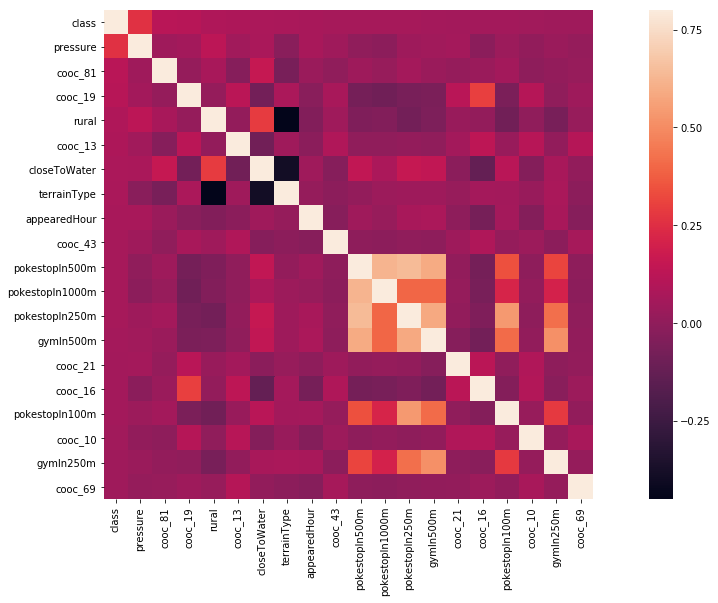

In [9]:
top_20_corrmat = df_train[cols].corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(top_20_corrmat, vmax=.8, square=True)

### 看看城市和類別的差異

- city vs class

In [10]:
df_train['city']

0            Bangkok
1           New_York
2           New_York
3             Hobart
4        Los_Angeles
5            Kuching
6        Mexico_City
7           New_York
8            Chicago
9           New_York
10              Rome
11           Chicago
12             Tokyo
13             Perth
14      Buenos_Aires
15       Los_Angeles
16          New_York
17          New_York
18           Bangkok
19          New_York
20             Tokyo
21          New_York
22         Ljubljana
23           Chicago
24           Phoenix
25       Los_Angeles
26           Phoenix
27           Chicago
28          New_York
29              Rome
            ...     
7130     Los_Angeles
7131     Los_Angeles
7132       Amsterdam
7133         Phoenix
7134           Paris
7135            Rome
7136        New_York
7137    Buenos_Aires
7138         Chicago
7139          Dublin
7140          Brunei
7141       Amsterdam
7142     Los_Angeles
7143        New_York
7144           Paris
7145          London
7146       St

### Groupby

- city

- appearedTimeOfDay

- temperature

- urban

- class

- pressure


#### city

In [11]:
city_ = df_train.groupby(['city'])
city_.size().describe()

count      73.000000
mean       98.082192
std       227.251009
min         1.000000
25%         4.000000
50%        19.000000
75%        56.000000
max      1387.000000
dtype: float64

#### appearedTimeOfDay

In [12]:
appear_time_day = df_train.groupby(['appearedTimeOfDay'])
appear_time_day.size()

appearedTimeOfDay
afternoon    1045
evening      1023
morning      1311
night        3781
dtype: int64

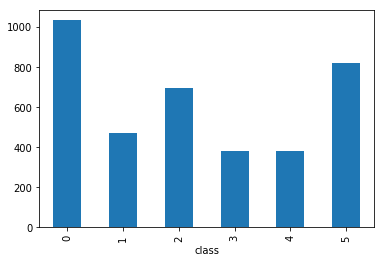

In [13]:
appear_time_day_night_with_class_ = appear_time_day.get_group('night').groupby(['class'])
appear_time_day_night_with_class_.size().plot.bar()

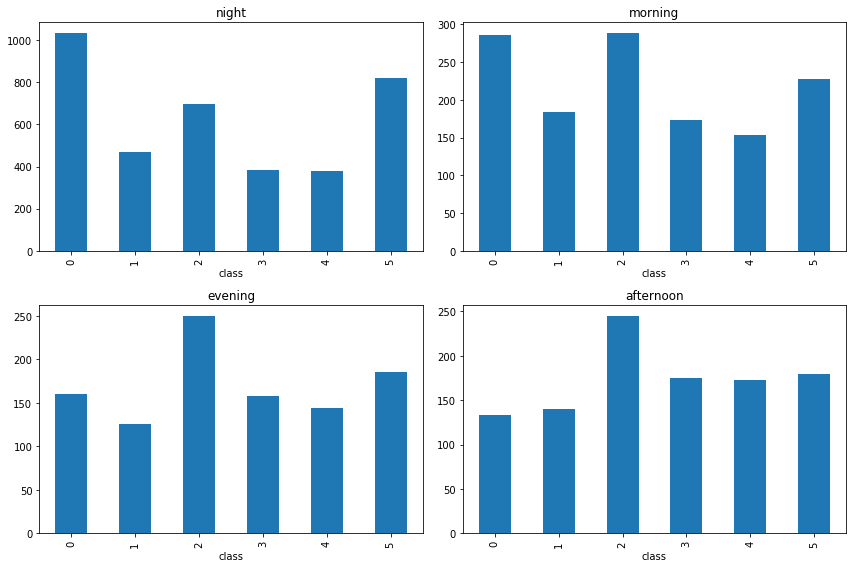

In [14]:
plt.figure(figsize=(12, 8))
# ax1
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("night")

# ax2
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("morning")

# ax3
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("evening")

# ax4
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("afternoon")


appear_time_day_night_with_class_ = appear_time_day.get_group('night').groupby(['class'])
appear_time_day_night_with_class_.size().plot.bar(ax=ax1)

appear_time_day_morning_with_class_ = appear_time_day.get_group('morning').groupby(['class'])
appear_time_day_morning_with_class_.size().plot.bar(ax=ax2)
appear_time_day_evening_with_class_ = appear_time_day.get_group('evening').groupby(['class'])
appear_time_day_evening_with_class_.size().plot.bar(ax=ax3)
appear_time_day_afternoon_with_class_ = appear_time_day.get_group('afternoon').groupby(['class'])
appear_time_day_afternoon_with_class_.size().plot.bar(ax=ax4)

plt.tight_layout()

#### temperature

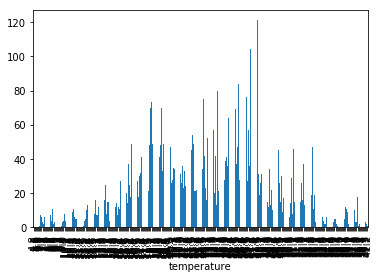

In [15]:
temperature = df_train.groupby(['temperature'])
temperature.size().plot.bar()

#### urban

In [16]:
urban = df_train.groupby(['urban'])
urban.size()

urban
False    4019
True     3141
dtype: int64

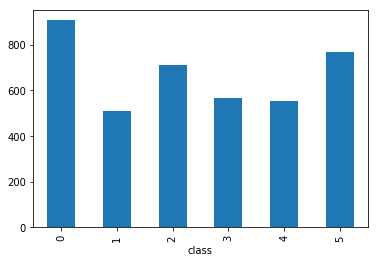

In [17]:
urban_false_with_class =urban.get_group(False).groupby(['class'])
urban_false_with_class.size().plot.bar()

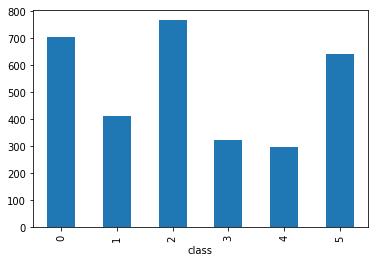

In [18]:
urban_true_with_class =urban.get_group(True).groupby(['class'])
urban_true_with_class.size().plot.bar()

#### class

In [19]:
class_ = df_train.groupby(['class'])
class_.size()

class
0    1611
1     920
2    1478
3     889
4     851
5    1411
dtype: int64

#### pressure

In [20]:
pressure_ = df_train.groupby(['pressure'])
pressure_.size()

pressure
996.33      3
996.86      4
999.47      1
999.67      1
1000.39     1
1000.51     2
1000.70     1
1000.89     1
1000.91     5
1000.92     3
1000.98    11
1001.00     7
1001.02     2
1001.10     2
1001.14     1
1001.18     4
1001.19     3
1001.20     3
1001.32     3
1001.37     4
1001.42     2
1001.49     1
1001.51     3
1001.58    11
1001.67     1
1001.74     1
1001.80     1
1001.81     2
1001.85     2
1001.90     2
           ..
1027.46     1
1027.47     1
1027.50     1
1027.53     1
1027.79     1
1027.98     1
1028.06     1
1028.11     1
1028.15     1
1028.32     2
1028.36     1
1028.39     1
1028.50     2
1028.56     3
1028.57     1
1028.73     3
1028.97     2
1028.99     1
1029.08     3
1029.13     1
1029.14     3
1029.17     1
1029.19     5
1029.63     2
1030.19     3
1030.72     6
1033.47     3
1033.48     6
1033.54     1
1034.17     1
Length: 1523, dtype: int64

In [21]:
pressure_ = df_train.groupby(['pressure'])
pd.cut(pressure_.size(), np.arange(0, 101, 10))

pressure
996.33      (0, 10]
996.86      (0, 10]
999.47      (0, 10]
999.67      (0, 10]
1000.39     (0, 10]
1000.51     (0, 10]
1000.70     (0, 10]
1000.89     (0, 10]
1000.91     (0, 10]
1000.92     (0, 10]
1000.98    (10, 20]
1001.00     (0, 10]
1001.02     (0, 10]
1001.10     (0, 10]
1001.14     (0, 10]
1001.18     (0, 10]
1001.19     (0, 10]
1001.20     (0, 10]
1001.32     (0, 10]
1001.37     (0, 10]
1001.42     (0, 10]
1001.49     (0, 10]
1001.51     (0, 10]
1001.58    (10, 20]
1001.67     (0, 10]
1001.74     (0, 10]
1001.80     (0, 10]
1001.81     (0, 10]
1001.85     (0, 10]
1001.90     (0, 10]
             ...   
1027.46     (0, 10]
1027.47     (0, 10]
1027.50     (0, 10]
1027.53     (0, 10]
1027.79     (0, 10]
1027.98     (0, 10]
1028.06     (0, 10]
1028.11     (0, 10]
1028.15     (0, 10]
1028.32     (0, 10]
1028.36     (0, 10]
1028.39     (0, 10]
1028.50     (0, 10]
1028.56     (0, 10]
1028.57     (0, 10]
1028.73     (0, 10]
1028.97     (0, 10]
1028.99     (0, 10]
1029.08    

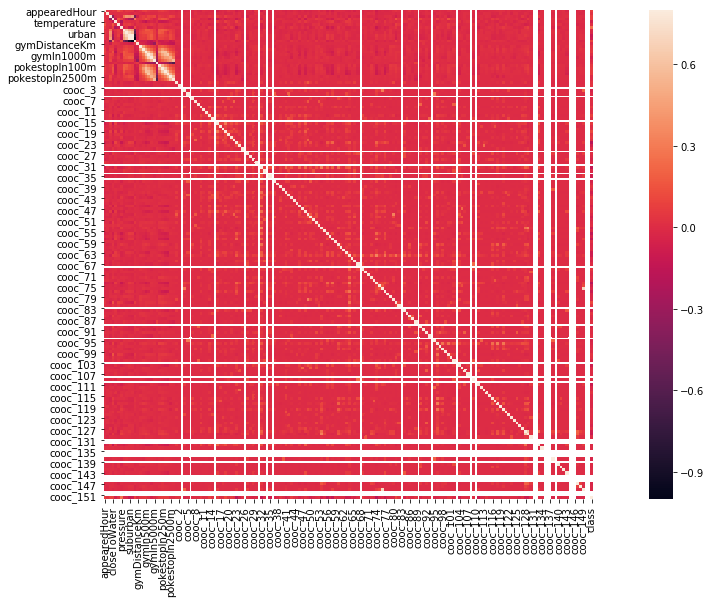

In [22]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout

from keras import regularizers

Using TensorFlow backend.


In [24]:
df_train_drop_class = df_train.drop(columns='class')
# pd.concat([])
df_total = pd.concat([df_train_drop_class, df_test], axis=0)
df_total.head(10)

C:\Users\tim23\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,ID,appearedHour,appearedMinute,appearedTimeOfDay,city,closeToWater,continent,cooc_1,cooc_10,cooc_100,...,population_density,pressure,rural,suburban,temperature,terrainType,urban,weather,weatherIcon,windSpeed
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,19,10,evening,Bangkok,False,Asia,False,True,False,...,6019.04440,1008.96,False,True,27.8,13,True,Clear,clear-day,9.00
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,5,19,night,New_York,True,America,False,False,False,...,0.00000,1018.96,True,False,26.1,13,False,Clear,clear-night,8.70
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,19,46,evening,New_York,True,America,False,False,False,...,0.00000,1023.22,True,False,24.7,0,False,Clear,clear-day,16.82
3,MTU2OTA5MTcyMDMzOTc0NzczODk=,11,10,morning,Hobart,True,Australia,False,False,False,...,128.89505,1014.19,True,False,12.7,0,False,Clear,clear-night,13.25
4,NTE2OTkxNjE3OTUzODY0MTE4MQ==,18,32,evening,Los_Angeles,True,America,False,False,False,...,4188.39100,1011.36,False,True,19.1,13,True,PartlyCloudy,partly-cloudy-day,5.78
5,NDIxMTM5NjUwODY2MzMxNTQwNQ==,13,7,afternoon,Kuching,False,Asia,False,False,False,...,411.31375,1011.04,False,True,25.0,13,False,Clear,clear-day,1.88
6,MTQyMzc1MTk5OTQ5NTU0NDYzOTc=,4,1,night,Mexico_City,False,America,False,False,False,...,2431.23410,1018.00,False,True,26.7,14,True,Clear,clear-night,1.01
7,NDIxODg3ODg5MTc0MjA0MDQ0NQ==,15,19,afternoon,New_York,True,America,False,False,False,...,0.00000,1019.61,True,False,29.7,0,False,Clear,clear-day,4.82
8,MTQyNTE3NTc3NzU4MjYzNDM5MTc=,22,18,night,Chicago,False,America,False,False,False,...,849.44226,1012.09,False,True,26.2,13,True,PartlyCloudy,partly-cloudy-day,6.26
9,MTA0MjI1MTc0MjEzMzcyMzM0Mzc=,15,36,afternoon,New_York,True,America,False,False,True,...,0.00000,1020.64,True,False,28.1,0,False,PartlyCloudy,partly-cloudy-day,6.43


In [25]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [26]:
y_train = df_train['class']
df_total_x = df_total[['pressure', 'cooc_81', 'cooc_19', 'rural', 'cooc_13',
       'closeToWater', 'terrainType', 'appearedHour', 'cooc_43',
       'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m',
       'cooc_21', 'cooc_16', 'pokestopIn100m', 'cooc_10', 'gymIn250m',
       'cooc_69', 'appearedTimeOfDay', 'weather']]

df_total_2 = df_total_x[['pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m']]

df_total_3 = df_total_x[['pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m', 'pokestopIn100m', 'gymIn250m']]

df_total_4 = df_total_x[[ 'appearedHour', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m', 'pokestopIn100m', 'gymIn250m']]

df_total_5 = df_total_x[[ 'closeToWater', 'appearedHour', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m', 'pokestopIn100m', 'gymIn250m']]

df_total_6 = df_total_x[[ 'terrainType', 'closeToWater', 'appearedHour', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m', 'pokestopIn100m', 'gymIn250m']]

df_total_7 = df_total_x[[ 'appearedTimeOfDay', 'terrainType', 'closeToWater', 'appearedHour', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m', 'pokestopIn100m', 'gymIn250m']]

df_total_8 = df_total_x[[ 'weather','appearedTimeOfDay', 'terrainType', 'closeToWater', 'appearedHour', 'pokestopIn500m', 'pokestopIn1000m', 'pokestopIn250m', 'gymIn500m', 'pokestopIn100m', 'gymIn250m']]

dummy_df_7 = pd.get_dummies(df_total_7)

dummy_df_8 = pd.get_dummies(df_total_8)


In [27]:
def appear_time_to_number(df):
    """
    feature scaling
    appearedTimeOfDay
    afternoon    1322
    evening      1233
    morning      1657
    night        4739
    :param df:
    :return: custom number
    """
    if df['appearedTimeOfDay'] == 'afternoon':
        return 0
    elif df['appearedTimeOfDay'] == 'evening':
        return 1
    elif df['appearedTimeOfDay'] == 'morning':
        return 2
    elif df['appearedTimeOfDay'] == 'night':
        return 3

In [28]:
def weather_machine_(df):
    if df['weather'] == 'Clear':
        return -.5
    elif df['weather'] == 'PartlyCloudy':
        return .75
    elif df['weather'] == 'MostlyCloudy':
        return .48
    elif df['weather'] == 'Overcast':
        return .5
    elif df['weather'] == 'LightRain':
        return .3
    elif df['weather'] == 'Breezy':
        return -1
    elif df['weather'] == 'Drizzle':
        return -.3
    elif df['weather'] == 'rain':
        return .8
    else:
        return 0


In [65]:
def continent_machine_(df):
    if df['continent'] == 'Africa':
        return -1
    elif df['continent'] == 'America':
        return -0.75
    elif df['continent'] == 'America/Argentina':
        return -0.5
    elif df['continent'] == 'America/Indiana':
        return 0
    elif df['continent'] == 'Asia':
        return .125
    elif df['continent'] == 'Australia':
        return .3
    elif df['continent'] == 'Europe':
        return .75
    elif df['continent'] == 'Pacific':
        return 1

In [86]:
def continent_machine_2(df):
    if df['continent'] == 'America':
        return 4
    elif df['continent'] == 'Asia':
        return 3
    elif df['continent'] == 'Europe':
        return 2
    elif df['continent'] == 'Australia':
        return 1
    else:
        return 0

### sklearn features selection 

In [106]:
from sklearn import preprocessing

y_train = df_train['class']
# 拿掉 ID
df_toal_drop_ID = df_total.drop(columns='ID')

# 拿掉 city --> city 不要拿 accuracy 會降!
df_toal_drop_ID_city = df_toal_drop_ID.drop(columns='city')

# 拿掉 conteinent --> 2019/08/24 下午五點！　不拿
df_toal_drop_ID_conteinent = df_toal_drop_ID.drop(columns='continent')

# 拿掉 id
df_toal_drop_ID_conteinent_id = df_toal_drop_ID.drop(columns='id')


"""
feature engineering: 
    1. sklearn.preprocessing.minmax_scale
       appearedTimeOfDay, terrainType, temperature, windSpeed, pressure, population_density, pokestopDistanceKm, gymDistanceKm
    2. sklearn.preprocessing.label_binarize
       urban, rural, gymIn100m, gymIn2500m, gymIn250m, gymIn5000m, gymIn500m,
       suburban, midurban , closeToWater
       pokestopIn100m pokestopIn2500m pokestopIn250m pokestopIn5000m pokestopIn500m
"""
df_ready_feature_engineering = df_toal_drop_ID_conteinent_id

# custom feature engineering apply
df_ready_feature_engineering['appearedTimeOfDay'] = df_ready_feature_engineering.apply(appear_time_to_number, axis=1)

# weather
df_ready_feature_engineering['weather'] = df_ready_feature_engineering.apply(weather_machine_, axis=1)
df_ready_feature_engineering['weather'] = preprocessing.minmax_scale(df_ready_feature_engineering['weather'])

# continent
df_ready_feature_engineering['continent'] = df_ready_feature_engineering.apply(continent_machine_2, axis=1)
# df_ready_feature_engineering['continent'] = preprocessing.minmax_scale(df_ready_feature_engineering['continent'])

# sklearn.preprocessing.minmax_scale
df_ready_feature_engineering['terrainType'] = preprocessing.minmax_scale(df_ready_feature_engineering['terrainType'])
df_ready_feature_engineering['temperature'] = preprocessing.minmax_scale(df_ready_feature_engineering['temperature'])
df_ready_feature_engineering['windSpeed'] = preprocessing.minmax_scale(df_ready_feature_engineering['windSpeed'])
df_ready_feature_engineering['pressure'] = preprocessing.minmax_scale(df_ready_feature_engineering['pressure'])
# 突破! 讓我進到 baseline!
df_ready_feature_engineering['population_density'] = preprocessing.minmax_scale(df_ready_feature_engineering['population_density'])

df_ready_feature_engineering['pokestopDistanceKm'] = preprocessing.minmax_scale(df_ready_feature_engineering['pokestopDistanceKm']).round(6)
df_ready_feature_engineering['gymDistanceKm'] = preprocessing.minmax_scale(df_ready_feature_engineering['gymDistanceKm']).round(6)

# binarize
df_ready_feature_engineering['urban'] = preprocessing.label_binarize(df_ready_feature_engineering['urban'], [1, 0])
df_ready_feature_engineering['rural'] = preprocessing.label_binarize(df_ready_feature_engineering['rural'], [1, 0])
df_ready_feature_engineering['suburban'] = preprocessing.label_binarize(df_ready_feature_engineering['suburban'], [1, 0])
df_ready_feature_engineering['midurban'] = preprocessing.label_binarize(df_ready_feature_engineering['midurban'], [1, 0])
df_ready_feature_engineering['closeToWater'] = preprocessing.label_binarize(df_ready_feature_engineering['closeToWater'], [1, 0])

df_ready_feature_engineering['gymIn100m'] = preprocessing.label_binarize(df_ready_feature_engineering['gymIn100m'], [1, 0])
df_ready_feature_engineering['gymIn2500m'] = preprocessing.label_binarize(df_ready_feature_engineering['gymIn2500m'], [1, 0])
df_ready_feature_engineering['gymIn250m'] = preprocessing.label_binarize(df_ready_feature_engineering['gymIn250m'], [1, 0])
df_ready_feature_engineering['gymIn5000m'] = preprocessing.label_binarize(df_ready_feature_engineering['gymIn5000m'], [1, 0])
df_ready_feature_engineering['gymIn500m'] = preprocessing.label_binarize(df_ready_feature_engineering['gymIn500m'], [1, 0])

df_ready_feature_engineering['pokestopIn100m'] = preprocessing.label_binarize(df_ready_feature_engineering['pokestopIn100m'], [1, 0])
df_ready_feature_engineering['pokestopIn2500m'] = preprocessing.label_binarize(df_ready_feature_engineering['pokestopIn2500m'], [1, 0])
df_ready_feature_engineering['pokestopIn250m'] = preprocessing.label_binarize(df_ready_feature_engineering['pokestopIn250m'], [1, 0])
df_ready_feature_engineering['pokestopIn5000m'] = preprocessing.label_binarize(df_ready_feature_engineering['pokestopIn5000m'], [1, 0])
df_ready_feature_engineering['pokestopIn500m'] = preprocessing.label_binarize(df_ready_feature_engineering['pokestopIn500m'], [1, 0])

for i in range(150):
    df_ready_feature_engineering['cooc_{}'.format(i+1)] = preprocessing.label_binarize(df_ready_feature_engineering['cooc_{}'.format(i+1)], [1, 0] )


dummy_total =pd.get_dummies(df_ready_feature_engineering)

x_train_dummy_total = dummy_total[:7160]
x_test_dummy_total = dummy_total[7160:]

df_total_x_selector = SelectKBest(chi2, k=200)
df_total_x_selector.fit_transform(x_train_dummy_total, y_train)



array([[19, 10, 1, ..., 0, 0, 0],
       [5, 19, 3, ..., 0, 0, 0],
       [19, 46, 1, ..., 0, 0, 0],
       ...,
       [15, 53, 0, ..., 0, 0, 0],
       [0, 28, 3, ..., 0, 0, 0],
       [7, 19, 2, ..., 0, 0, 0]], dtype=object)

In [107]:
x_train_dummy_total.shape

(7160, 263)

In [108]:
cols = df_total_x_selector.get_support(indices=True)
feature_name = x_train_dummy_total.columns[cols]
feature_name

Index(['appearedHour', 'appearedMinute', 'appearedTimeOfDay', 'closeToWater',
       'continent', 'cooc_1', 'cooc_10', 'cooc_100', 'cooc_101', 'cooc_102',
       ...
       'city_Zagreb', 'city_Zurich', 'weatherIcon_clear-day',
       'weatherIcon_clear-night', 'weatherIcon_cloudy', 'weatherIcon_fog',
       'weatherIcon_partly-cloudy-day', 'weatherIcon_partly-cloudy-night',
       'weatherIcon_rain', 'weatherIcon_wind'],
      dtype='object', length=200)

In [109]:
x_test_dummy_total = x_test_dummy_total[feature_name]
x_test_dummy_total.head()

,appearedHour,appearedMinute,appearedTimeOfDay,closeToWater,continent,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,...,city_Zagreb,city_Zurich,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind
0,8,26,2,1,2,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,2,35,3,0,4,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,5,3,0,4,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,7,38,2,0,2,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,1,27,3,1,4,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [110]:
best_feature_total = dummy_total[feature_name]
best_feature_total

x_train_best = best_feature_total[:7160]
x_test_best = best_feature_total[7160:]

In [111]:

x_train = df_total[:7160]
x_test = df_total[7160:]


x_train_2 = df_total_2[:7160]
x_test_2 = df_total_2[7160:]

x_train_3 = df_total_3[:7160]
x_test_3 = df_total_3[7160:]

x_train_4 = df_total_4[:7160]
x_test_4 = df_total_4[7160:]

x_train_5 = df_total_5[:7160]
x_test_5 = df_total_5[7160:]

x_train_6 = df_total_6[:7160]
x_test_6 = df_total_6[7160:]

x_train_7 = dummy_df_7[:7160]
x_test_7 = dummy_df_7[7160:]

x_train_8 = dummy_df_8[:7160]
x_test_8 = dummy_df_8[7160:]

In [112]:
print('x_train_7.shape: ', x_train_7.shape)
print('x_train_8.shape: ', x_train_8.shape)

x_train_7.shape:  (7160, 13)
x_train_8.shape:  (7160, 38)


In [96]:
len(x_train.columns)

184

In [97]:
from keras.layers import BatchNormalization

In [117]:
model = tf.keras.Sequential()

In [118]:
model.add(Dense(50, activation='relu', input_shape=(200, ), ))
# model.add(Dense(20, activation='elu', kernel_regularizer=regularizers.l2(0.01),))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(Dropout(0.1))
model.add(Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(6, activation='softmax'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 20)                1020      
_________________________________________________________________
dropout_15 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 12)                252       
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 78        
Total params: 11,400
Trainable params: 11,400
Non-trainable params: 0
__________________________________________________

In [119]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [120]:
y_train_hot = np.zeros((len(y_train), 6))
y_train_hot[np.arange(len(y_train)), y_train] = 1
y_train_hot

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [128]:
model_history = model.fit(x=x_train_best, y=y_train_hot,
                          batch_size=60, epochs=80,
                          validation_split= 0.1,shuffle=True
                          )

Train on 6444 samples, validate on 716 samples
Epoch 1/80
6444/6444 [==============================] - 0s 41us/sample - loss: 1.0072 - acc: 0.6372 - val_loss: 1.3272 - val_acc: 0.5642
Epoch 2/80
6444/6444 [==============================] - 0s 37us/sample - loss: 1.0180 - acc: 0.6339 - val_loss: 1.2909 - val_acc: 0.5754
Epoch 3/80
6444/6444 [==============================] - 0s 37us/sample - loss: 1.0116 - acc: 0.6392 - val_loss: 1.3032 - val_acc: 0.5782
Epoch 4/80
6444/6444 [==============================] - 0s 38us/sample - loss: 1.0175 - acc: 0.6392 - val_loss: 1.2855 - val_acc: 0.5880
Epoch 5/80
6444/6444 [==============================] - ETA: 0s - loss: 0.9914 - acc: 0.6457- ETA: 0s - loss: 1.0100 - acc: 0.6 - 0s 39us/sample - loss: 0.9932 - acc: 0.6457 - val_loss: 1.2970 - val_acc: 0.5838
Epoch 6/80
6444/6444 [==============================] - 0s 39us/sample - loss: 0.9974 - acc: 0.6491 - val_loss: 1.2834 - val_acc: 0.5810
Epoch 7/80
6444/6444 [==============================] - E

In [131]:
y_predict = model.predict_classes(x_test_best)

In [132]:
ans = y_predict.reshape((-1, 1))

In [133]:
len(ans)
ans

with open('result_2019_08_23_pokemon.csv', 'a') as a_writer:
    for i in range(len(ans)):
        result_r = csv.writer(a_writer, lineterminator='\n')
        result_r.writerow(ans[i])

In [129]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

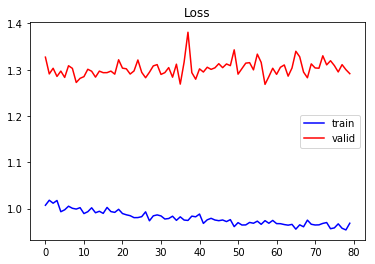

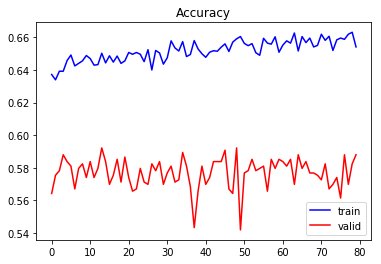

In [130]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()